The required imports and some initializations.

In [1]:
from google_analytics import *

# Define the auth scopes to request.
scope = ['https://www.googleapis.com/auth/analytics.readonly']

# Use the developer console and replace the values with your
# service account email and relative location of your key file.
key_file_location = get_service_key_path('example')

# Authenticate and construct service.
service = get_service('analytics', 'v3', scope, key_file_location)
experiments = get_experiments(service)

# Retrieve information
var_names = {}
for exp in experiments['items']:
    exp_id = str(exp['id'])
    var_names[exp_id] = [str(item['name']) for item in exp['variations']]
print 'variations', var_names

account 5318270
property <type 'property'>
profile 120892623
variations {'zQYn4S5ZR1mDiD75IC22KA': ['0-0-2-2-2-0-2-0', '1-1-2-1-1-2-1-1', '1-1-3-1-1-2-2-0', '1-0-1-1-0-0-2-1', '1-0-1-1-1-2-0-1'], 'CYvpnCUtTPWx9ZfxZYlUow': ['0-0-2-2-2-0-2-0', '0-0-2-1-0-0-2-0', '1-0-1-2-2-1-0-0'], 'r9vplR-kQ8aZ1TsK8ZmbbQ': ['0-0-2-2-2-0-2-0', '0-0-2-2-2-1-0-0', '1-0-1-1-0-0-2-0'], 'x7azTDsqSSyF0oirv4wvUg': ['0-0-2-2-2-0-2-0', '0-0-0-1-1-0-1-0', '0-0-2-0-1-1-1-1'], 'gw7IWGSvQFegRrU8mU2x3Q': ['0-0-2-2-2-0-2-0', '1-0-0-1-0-0-1-1', '0-0-2-0-1-1-0-1', '0-1-2-3-0-0-2-0', '0-0-3-2-1-0-2-1'], 'QHECYoMqQ1CrrHcIF_D50w': ['0-0-2-2-2-0-2-0', '1-0-3-0-0-2-0-1'], 'x8DtGwZYTyq2eWG8m5UK7Q': ['0-0-2-2-2-0-2-0', '1-0-1-1-0-1-0-0', '0-1-2-2-1-2-2-1', '1-1-3-0-0-1-0-1', '1-0-3-0-0-2-1-1']}


Starting from a certain point in time, retrieve per-day data and store it in memory.

In [9]:
import datetime

data = {}
date = datetime.datetime.strptime('2016-04-25', "%Y-%m-%d")
profile = get_first_profile_id(service)

data = []
for i in range(15):
    datestr = date.strftime('%Y-%m-%d')
    date += datetime.timedelta(days=1)

    results = get_results(service, profile, metrics='ga:exitRate', start_date=datestr, end_date=datestr)

    for row in results['rows']:
        print row
        data.append(float(row[0]))
        

account 5318270
property <type 'property'>
profile 120892623
[u'30.917455310199788']
[u'29.28025217442064']
[u'27.46411142378798']
[u'31.293881644934807']
[u'27.973233712385564']
[u'26.62546059669559']
[u'30.480956025195738']
[u'32.83072268579515']
[u'32.91433809918375']
[u'32.38367524368427']
[u'30.48761391750963']
[u'32.6741807388392']
[u'30.29222091409092']
[u'32.90650999035723']
[u'35.70782761171539']


[30.917455310199788, 29.28025217442064, 27.46411142378798, 31.293881644934807, 27.973233712385564, 26.62546059669559, 30.480956025195738, 32.83072268579515, 32.91433809918375, 32.38367524368427, 30.48761391750963, 32.6741807388392, 30.29222091409092, 32.90650999035723, 35.70782761171539]


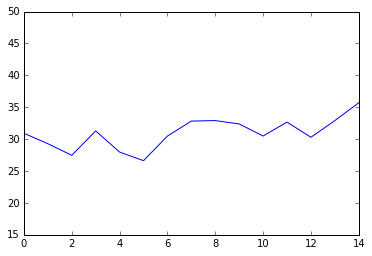

In [16]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
% matplotlib inline
print data
plt.ylim(15,50)
plt.plot(data)

Give some insights per experiment. It will display the number of datapoints per variation per experiment.

In [8]:
for experiment in data:
    for variation in data[experiment]:
        print(experiment, variation, len(data[experiment][variation]['dates']))

('zQYn4S5ZR1mDiD75IC22KA', '1-1-2-1-1-2-1-1', 4)
('zQYn4S5ZR1mDiD75IC22KA', '1-0-1-1-1-2-0-1', 4)
('zQYn4S5ZR1mDiD75IC22KA', '0-0-2-2-2-0-2-0', 4)
('zQYn4S5ZR1mDiD75IC22KA', '1-0-1-1-0-0-2-1', 4)
('zQYn4S5ZR1mDiD75IC22KA', '1-1-3-1-1-2-2-0', 4)
('r9vplR-kQ8aZ1TsK8ZmbbQ', '0-0-2-2-2-1-0-0', 11)
('r9vplR-kQ8aZ1TsK8ZmbbQ', '0-0-2-2-2-0-2-0', 11)
('r9vplR-kQ8aZ1TsK8ZmbbQ', '1-0-1-1-0-0-2-0', 11)
('QHECYoMqQ1CrrHcIF_D50w', '0-0-2-2-2-0-2-0', 10)
('QHECYoMqQ1CrrHcIF_D50w', '1-0-3-0-0-2-0-1', 10)
('x8DtGwZYTyq2eWG8m5UK7Q', '1-0-1-1-0-1-0-0', 13)
('x8DtGwZYTyq2eWG8m5UK7Q', '1-0-3-0-0-2-1-1', 13)
('x8DtGwZYTyq2eWG8m5UK7Q', '0-0-2-2-2-0-2-0', 13)
('x8DtGwZYTyq2eWG8m5UK7Q', '0-1-2-2-1-2-2-1', 13)
('x8DtGwZYTyq2eWG8m5UK7Q', '1-1-3-0-0-1-0-1', 13)
('CYvpnCUtTPWx9ZfxZYlUow', '0-0-2-1-0-0-2-0', 9)
('CYvpnCUtTPWx9ZfxZYlUow', '0-0-2-2-2-0-2-0', 9)
('CYvpnCUtTPWx9ZfxZYlUow', '1-0-1-2-2-1-0-0', 9)


Make the plots!

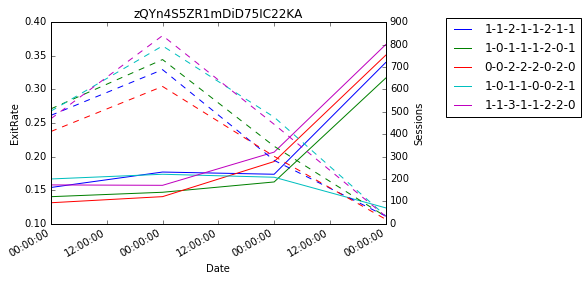

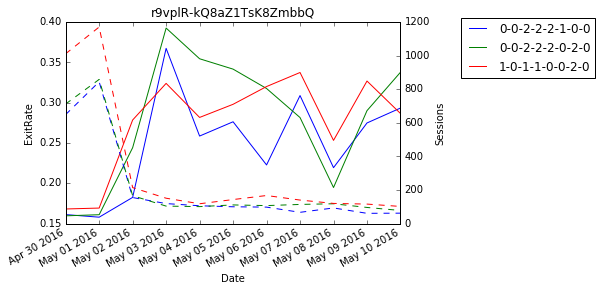

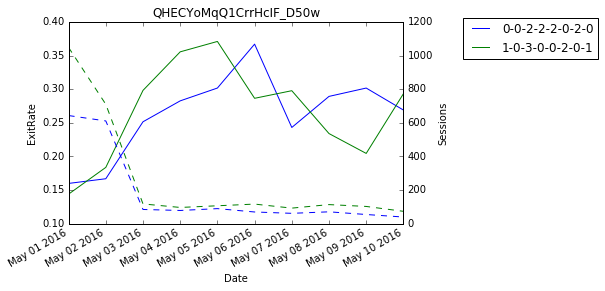

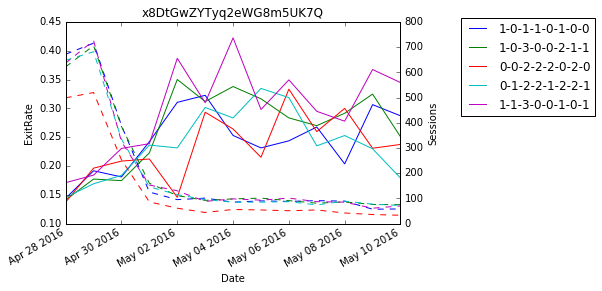

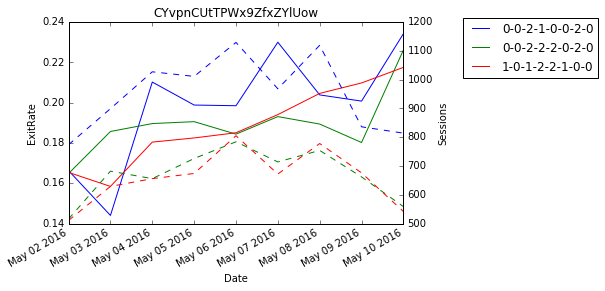

In [9]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
% matplotlib inline

for experiment in data:
    fig, ax = plt.subplots()
    ax.fmt_xdata = DateFormatter('%Y-%m-%d')
    for variation in data[experiment]:
        ax.plot(data[experiment][variation]['dates'], data[experiment][variation]['data'], label=variation)
    ax.set_ylabel('ExitRate')
    ax.set_xlabel('Date')
    ax.set_title(experiment)
    bx = ax.twinx()
    for variation in data[experiment]:
        bx.plot(data[experiment][variation]['dates'], data[experiment][variation]['sessions'], label=variation, ls='--')
    bx.set_ylabel('Sessions')
    fig.autofmt_xdate()
    ax.legend(bbox_to_anchor=(1.6, 1.05))
    plt.show()